# Exercise 05: Regression II

Welcome to the fifth exercise for Applied Machine Learning. 

Your objectives for this session are to: 
- implement regression models with multiple attributes and polynomial terms, 
- detect overfitting with hold-out data and cross-validation, and
- tune model hyperparameters with `GridSearchCV`.

---------------------

### Part 1: Training and testing a simple multiple linear regression

We will again be looking at `HomesSoldHellerup.csv`, so the data should be familar to you if you did the exercise from last week. But unlike last week, today we'll include multiple attributes and polynomial terms to build increasingly complex regression models. 

Let's start by importing our libraries for today.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# <font color='red'>TASK 1</font>

Read in the dataset, `HomesSoldHellerup.csv`, and define it as `homes_df`(remember: the separator in this dataset is a semicolon, not a comma).

In [2]:
homes_df = pd.read_csv('HomesSoldHellerup.csv', sep=';')
homes_df.head()

,Road name,Road Number,Type,m2,Build Year,ZipCode,City,Date of Sale,Type of Sale,Price
0,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,20-07-15,Alm. Salg,1700000
1,Tuborgvej,54,Lejlighed,87,1932,2900,Hellerup,12-05-15,Alm. Salg,2815000
2,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,29-12-10,Alm. Salg,1575000
3,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,10-04-12,Alm. Salg,1340000
4,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,04-02-12,Alm. Salg,1435000


# <font color='red'>TASK 2</font>

Now define your feature matrix `X` and target `y`. Create `X` with the features `m2` and `Build Year`. `y` should be the `Price` of a home.

In [3]:
# Selecting the features and the target
X = homes_df[['m2', 'Build Year']]
y = homes_df['Price']

# <font color='red'>TASK 3</font>

Use the `train_test_split` function that you used in Exercise 03 on `X` and `y` to create `X_train`, `X_test`, `y_train`, and `y_test`.

In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


If you've made the split correctly, the following code should return

`Xtrain (1620, 2) y_train (1620,) X_test (540, 2) y_test (540,)` 

In [5]:
print("X_train", X_train.shape, "y_train", 
      y_train.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

X_train (1620, 2) y_train (1620,) X_test (540, 2) y_test (540,)


# <font color='red'>TASK 4</font>

Now fit a linear regression model to `X_train` and `y_train` and define it as `lr`. Then print the model's training and test scores.

In [6]:
# Creating and training a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# print scores
print("Score on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(lr.score(X_test, y_test)))

Score on training set: 0.319
Score on test set: 0.352


How does the score on the training data compare to the score on the test data? What does this tell us?

**Answer:** The scores (*R^2*) you get can vary a bit since each time you make a train-test split, different instances might end up in the training vs. testing sets. When I ran mine, I got a training score of `0.319` and a test score of `0.352`. This suggests this simple model is probably *underfitting*. Neither the training nor test score are very high.

### Part 2: Training and testing a more complex polynomial regression model

One way we could try to improve on predictive performance of our simple multiple linear regression is to increase the complexity of the model by introducing more attributes and polynomial terms. With polynomial terms, the line we fit to the data can be curvy. Let's try it.  

# <font color='red'>TASK 5</font>

Re-define `X` and `y`. Create `X` with the features `m2`, `Type` , `City`, and `Build Year` (remember: categorical variables should be transformed into dummy variables). `y` should again be the `Price` of a home. Then make a train-test split just like you did before.

In [8]:
# re-define X and y
X = pd.get_dummies(homes_df[["m2", "Type", "City", "Build Year"]], drop_first=True) 
y = homes_df['Price']

In [9]:
# make train-test split to get X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now use the code below to create polynomial features on the training data to the degree of 5. 

In [10]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

To see what happened, compare the dimensions of the feature matrix before and after creating polynomial features below.

In [11]:
print("The dimensions of the feature matrix *before* adding polynomial features are:", X_train.shape)
print("The dimensions of the feature matrix *after* adding polynomial features are:", X_train_poly.shape)

The dimensions of the feature matrix *before* adding polynomial features are: (1620, 11)
The dimensions of the feature matrix *after* adding polynomial features are: (1620, 4368)


This should show that there are the same number of rows (`1620`) both before and after creating polynomial features. But, the number of columns after creating polynomial features has increased from `11` to `4368`. That's a lot of features — or, in other words, a lot of parameters to learn from the training data.  

# <font color='red'>TASK 6</font>

Now fit a linear regression model to `X_train_poly` and `y_train`, and print the model's training and test scores. Define the model as `poly_lr`.

In [12]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly,y_train)

LinearRegression()

In [13]:
print("Score on training set: {:.3f}".format(poly_lr.score(X_train_poly, y_train)))
print("Score on test set: {:.3f}".format(poly_lr.score(X_test_poly, y_test)))

Score on training set: 0.425
Score on test set: -2250369254.956


How does the score on the training data compare to the score on the test data? What does this tell us? 

**Answer:** Again, the scores (*R^2*) you get can vary a bit since each time you make a train-test split, different instances might end up in the training vs. testing sets. When I ran mine, I got a training score of `0.425` and a test score of `-2250369254.956`. 

This suggests this simple model is massively *overfitting* the data. The complex polynomial regression model acheives a higher training score than thensimpler multiple regression model we made above, but the test score is horrendous. The negative score suggests that we'd be better off predicting every new house to sell for the average prices of all homes, rather than using this complex model. This tells us that the complex model is not generalizable.

______

### Part 3: k-fold cross-validation

By now you might have noticed that the training and test scores you're getting might vary compared to others' around you. This is because the results you get are dependent on the train-test split, which involves randomly sampling from the datasets (i.e., your specific computer might used different instances as training data vs testing data, as compared to others' around you).

To get a sense of how much we should expect test scores to vary we can use a more sophisticated, "robust" approach to the train-test split: k-fold cross-validation. This can be especially useful if you don't have a very large dataset to begin with and you want to make use of all your data for training, rather than putting aside some of it in a test set.

# <font color='red'>TASK 7</font>

Use the `cross_val_score` function to apply k-fold cross-validation over `X` and `y` (all your data) with the simple model you made (`lr`). Specify that there should be 10 folds and save all the test scores as an object called `simple_scores`.

*Hint: you'll probably need to check out the documentation for `cross_val_score` here:* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [14]:
# Calculating cross-validated R-squared scores for the simple model
simple_scores = cross_val_score(lr, X, y, cv=10, scoring='r2')
simple_scores

array([ 0.64044587,  0.69143557,  0.28620623,  0.50556695,  0.5042357 ,
        0.45340015, -0.12910046,  0.17563052,  0.47831882,  0.43876373])

Use the code below to inspect the average and standard deviation of the test scores returned by the k-fold cross-validation your just performed. 

In [15]:
print("The average test score is:", simple_scores.mean())
print("The standard deviation of the test scores is:", simple_scores.std())

The average test score is: 0.40449030764336263
The standard deviation of the test scores is: 0.22765824453343875


# <font color='red'>TASK 8</font>

Now do the same again but for the complex model (`poly_lr`). 

1. Use the `cross_val_score` function to apply k-fold cross-validation over `X` and `y` (all your data) with the complex model you made (`poly_lr`). 
2. Specify that there should be 10 folds and save all the test scores as an object called `complex_scores`.
3. Inspect the average and standard deviation of `complex_scores`.

*Hint: You'll first need to create polynomial features to degree 5 for `X`, because before we just made polynomial features separately on `X_train` and `X_test`. So, your first lines of code should be `poly = PolynomialFeatures(degree=5)` and then `X_poly = poly.fit_transform(X)`.*

In [16]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
complex_scores = cross_val_score(poly_lr, X_poly, y, cv=10, scoring='r2')

print("The average test score is:", complex_scores.mean())
print("The standard deviation of the test scores is:", complex_scores.std())

The average test score is: -345750770452041.94
The standard deviation of the test scores is: 760061791129073.8


Compare the outputs of the k-fold cross-validation scores for the simple vs. complex model. What can we learn?

**Answer:** After all that hard work creating a complex polynomial model, it is greatly outperformed by the simple model due to overfitting. The average test score for the simple model is about `0.40`, which isn't fantastic, but it's not useless — the model model captures about 40% of the variability in the data, and the remaining 60% of the variability is unexplained and could be due to other factors or random noise. The average test score for the complex model is a very big negative value and the standard deviation is huge, which is bad — we'd be better off with a model that predicts the average house price every time. The complex model might have improved the training score, as compared to the simple model, but it overfit the data and does not generalize well to new, unseen data.

______

### Part 4: Tuning with GridSearchCV

Another way k-fold cross-validation can be useful is within the `GridSearchCV` function. Read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. The basic idea is that for any model with hyperparameters (e.g., `max_depth` for decision trees, `alpha` for Lasso and Ridge Regression), you can specify a range of possible values and see which values give you the best performance by iteratively running k-fold cross-validation within your training set, before ultimately evaluating a tuned model on your test set.

For example, we just saw how a regression model with polynomial degree of 5 overfit the data. But what if we set the polynomial degree to 1, 2, 3, or 4? With `GridSearchCV` we can easily try all these possibilities and compare performance before evaluating on a test set.

Run the code below and see if you can understand it line by line. For whatever models you choose to use in your course project, I strongly encourage you to tune your models and understand what the hyperparameters do.

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# set up the parameter grid - what values should we check for the polynomial degree?
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5]
}

# create the pipeline with PolynomialFeatures and LinearRegression
model = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# set up GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='r2', n_jobs=-1)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Mean R-squared for {params}: {mean_score}")

# retrieve the best hyperparameters and the corresponding best estimator
best_degree = grid_search.best_params_['poly_features__degree']
best_model = grid_search.best_estimator_

# print the best hyperparameters
print(f"Best Polynomial Degree: {best_degree}")

# evaluate the best model on the test data
test_score = best_model.score(X_test, y_test)
print(f"Test R-squared with best model: {test_score}")

Mean R-squared for {'poly_features__degree': 1}: 0.3228617322549717
Mean R-squared for {'poly_features__degree': 2}: -0.0075261640247399455
Mean R-squared for {'poly_features__degree': 3}: -230.87156251523788
Mean R-squared for {'poly_features__degree': 4}: -2890177863.486472
Mean R-squared for {'poly_features__degree': 5}: -14462713744747.957
Best Polynomial Degree: 1
Test R-squared with best model: 0.3574907461317438


The results of this process tell us that when we use the attributes `m2`, `Type`, `City`, and `Build Year` to predict `Price`. The best polynomial degree is 1, meaning we should just use a standard multiple linear regression, rather than adding complexity with polynomial features.

Importantly though, this is not always going to be the case. It will depend on the data and the task at hand.

______

### Part 5: A simulated example of overfitting

To provide a nice, clean, visual demonstration of overfitting, we can use simulated data. Run the code below and inspect the plots. Don't worry about the code provided — this is just for illustrative purposes.

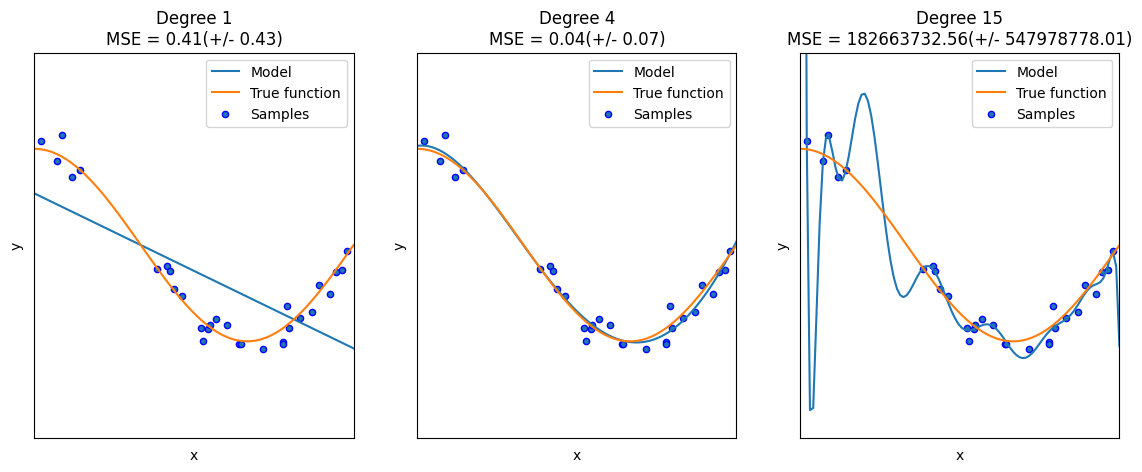

In [18]:
# defining a true function — the true relationship between x and y
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

# how many data points should we simulate?
n_samples = 30

# degrees mean the number of polynomial terms to add 
# e.g., 3 degrees means the linear regression equation is: y = b + w*x + w*x^2 + w*x^3
# here we're saying that we want a model with degree=1, a model with degree=4, and a model with degree=15
degrees = [1, 4, 15] 

# simulating some fake data for X and y
X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# fit our models and plot the outputs
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # evaluate the models using cross-validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    # plot with matplotlib library
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

What can you learn from the plots above? Try changing the values in `degrees` and see what happens.

*Note: here we've use mean squared error (MSE) as the loss function instead of R-squared. An arbitrary choice for this demonstration.*

---------
**That's it for this week! Next week we'll look at instance-based learning and practicing tuning hyperparameters some more.**